# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()


In [3]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove 'cm' from the columns names

def create_df():
    
    df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
    df['target'] = iris_data['target']
    df['class'] = iris_data.target_names[iris_data.target]
    return df
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
13,4.3,3.0,1.1,0.1,0,setosa
145,6.7,3.0,5.2,2.3,2,virginica
133,6.3,2.8,5.1,1.5,2,virginica
67,5.8,2.7,4.1,1.0,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
87,6.3,2.3,4.4,1.3,1,versicolor
72,6.3,2.5,4.9,1.5,1,versicolor
82,5.8,2.7,3.9,1.2,1,versicolor
114,5.8,2.8,5.1,2.4,2,virginica
122,7.7,2.8,6.7,2.0,2,virginica


In [4]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [5]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE

drop_df = df_iris.drop(['target', 'class'], axis=1)
x = np.array(drop_df)
#print(x)

In [6]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [7]:
mergings = 0 
# YOUR CODE HERE
mergings = linkage(x, method = 'complete')
print(mergings.shape)
#In single-link (or single linkage) hierarchical clustering, we merge in each step the two clusters 
#whose two closest members have the smallest distance (or: the two clusters with the smallest minimum 
#pairwise distance) 

(149, 4)


In [8]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

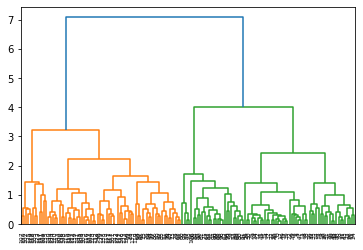

In [9]:
dn = 0
# YOUR CODE HERE
dn = dendrogram(mergings, leaf_rotation = 90, leaf_font_size = 6)
#dn = dendrogram(mergings, labels='varieties', leaf_rotation = 90, leaf_font_size = 6)
plt.show()

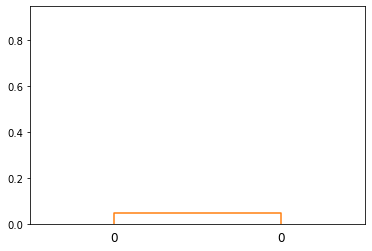

In [10]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [11]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values

#print(points, new_points)

**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [12]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters = 3)


In [13]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [14]:
# YOUR CODE HERE
a = model.fit(points)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [15]:
# YOUR CODE HERE
labels = a.predict(points)
labels

array([1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0,
       2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2,
       2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2])

In [16]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [17]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    for index ,i in enumerate (labels):
        if i==0:
            data_0.append(points[index])
        elif i==1:
            data_1.append(points[index])
        elif i==2:
            data_2.append(points[index])
            
    return np.array(data_0), np.array(data_1), np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

#print(data_0[:,1])
#print(data_0)

(94, 2)
(111, 2)
(95, 2)


In [18]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

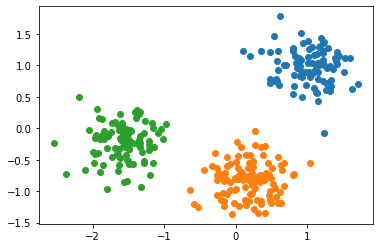

In [19]:
# plotting the data 

# YOUR CODE HERE
plt.scatter(data_0[:,0], data_0[:,1] )
plt.scatter(data_1[:,0], data_1[:,1])
plt.scatter(data_2[:,0], data_2[:,1])

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [20]:

# YOUR CODE HERE
new_labels = model.predict(new_points)


In [21]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [22]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

# YOUR CODE HERE
def separate_new_labels(labels, points):

    # YOUR CODE HERE
    for index ,i in enumerate (labels):
        if i==0:
            new_0.append(points[index])
        elif i==1:
            new_1.append(points[index])
        elif i==2:
            new_2.append(points[index])
            
    return np.array(new_0), np.array(new_1), np.array(new_2)


new_0,new_1,new_2 =separate_new_labels(new_labels, new_points)

print(new_0.shape)
print(new_1.shape)
print(new_2.shape)


(34, 2)
(32, 2)
(34, 2)


In [23]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

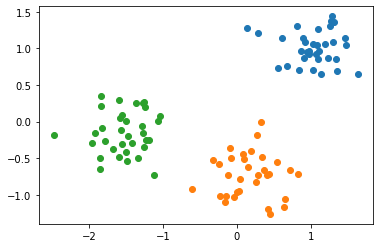

In [24]:
#plot the new labels


# YOUR CODE HERE
plt.scatter(new_0[:,0], new_0[:,1] )
plt.scatter(new_1[:,0], new_1[:,1])
plt.scatter(new_2[:,0], new_2[:,1])

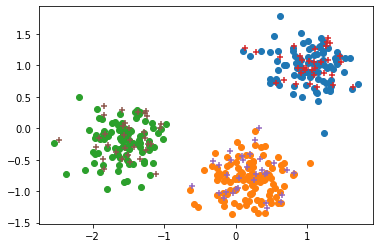

In [25]:
#plot all the points together

# YOUR CODE HERE
plt.scatter(data_0[:,0], data_0[:,1] , marker='o' )
plt.scatter(data_1[:,0], data_1[:,1], marker='o')
plt.scatter(data_2[:,0], data_2[:,1], marker='o')

plt.scatter(new_0[:,0], new_0[:,1], marker='+' )
plt.scatter(new_1[:,0], new_1[:,1], marker='+')
plt.scatter(new_2[:,0], new_2[:,1], marker='+')

#plt.show()